In [22]:
import geopandas as gpd
import pandas as pd
import folium
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
sns.set_style("whitegrid")

from shapely.geometry import Point
%matplotlib inline

In [2]:
mrds = pd.read_csv("mines_data/rdbms-tab-all/mrds.txt", sep='\t')
commod = pd.read_csv('mines_data/rdbms-tab-all/Commodity.txt', sep='\t')

In [3]:
mrds_geom = [Point(xy) for xy in zip(mrds.longitude, mrds.latitude)]
mrds = gpd.GeoDataFrame(mrds, geometry=mrds_geom)

In [4]:
ecoregions = gpd.read_file("eco_data/terr-ecoregions-TNC/tnc_terr_ecoregions.shp")


In [5]:
mines_eco = gpd.sjoin(mrds, ecoregions, op='within', how='left')

In [6]:
mrds.columns

Index(['i', 'dep_id', 'name', 'dev_stat', 'url', 'code_list', 'longitude',
       'latitude', 'geometry'],
      dtype='object')

In [7]:
mines = mines_eco.join(commod.set_index("dep_id").drop('i', axis=1), on="dep_id", how='inner', )

In [8]:
mines.columns

Index(['i', 'dep_id', 'name', 'dev_stat', 'url', 'code_list', 'longitude',
       'latitude', 'geometry', 'index_right', 'CLS_CODE', 'ECODE_NAME',
       'ECO_CODE', 'ECO_ID_U', 'ECO_NAME', 'ECO_NOTES', 'ECO_NUM', 'ER_DATE_U',
       'ER_RATION', 'ER_UPDATE', 'RealmMHT', 'SOURCEDATA', 'WWF_MHTNAM',
       'WWF_MHTNUM', 'WWF_REALM', 'WWF_REALM2', 'line', 'commod', 'code',
       'commod_tp', 'commod_group', 'import', 'inserted_by', 'insert_date',
       'updated_by', 'update_date'],
      dtype='object')

AttributeError: 'AxesSubplot' object has no attribute 'add_feature'

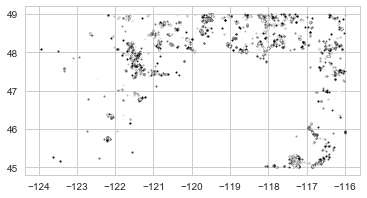

In [30]:
# washington POLYGON((-124.849 49.0024, -116.9156 49.0024, -116.9156 45.5435, -124.849 45.5435, -124.849 49.0024))
p = mines[(mines.commod == 'Copper') & 
      (mines.longitude > -124) &
      (mines.longitude < -116) &
      (mines.latitude < 49) & 
      (mines.latitude > 45)].plot()

p.add_feature(cartopy.feature.BORDERS)


---

Gold
Silver
Sand and Gravel
Copper
Lead
Zinc
Iron
Stone, Crushed
Uranium
Clays


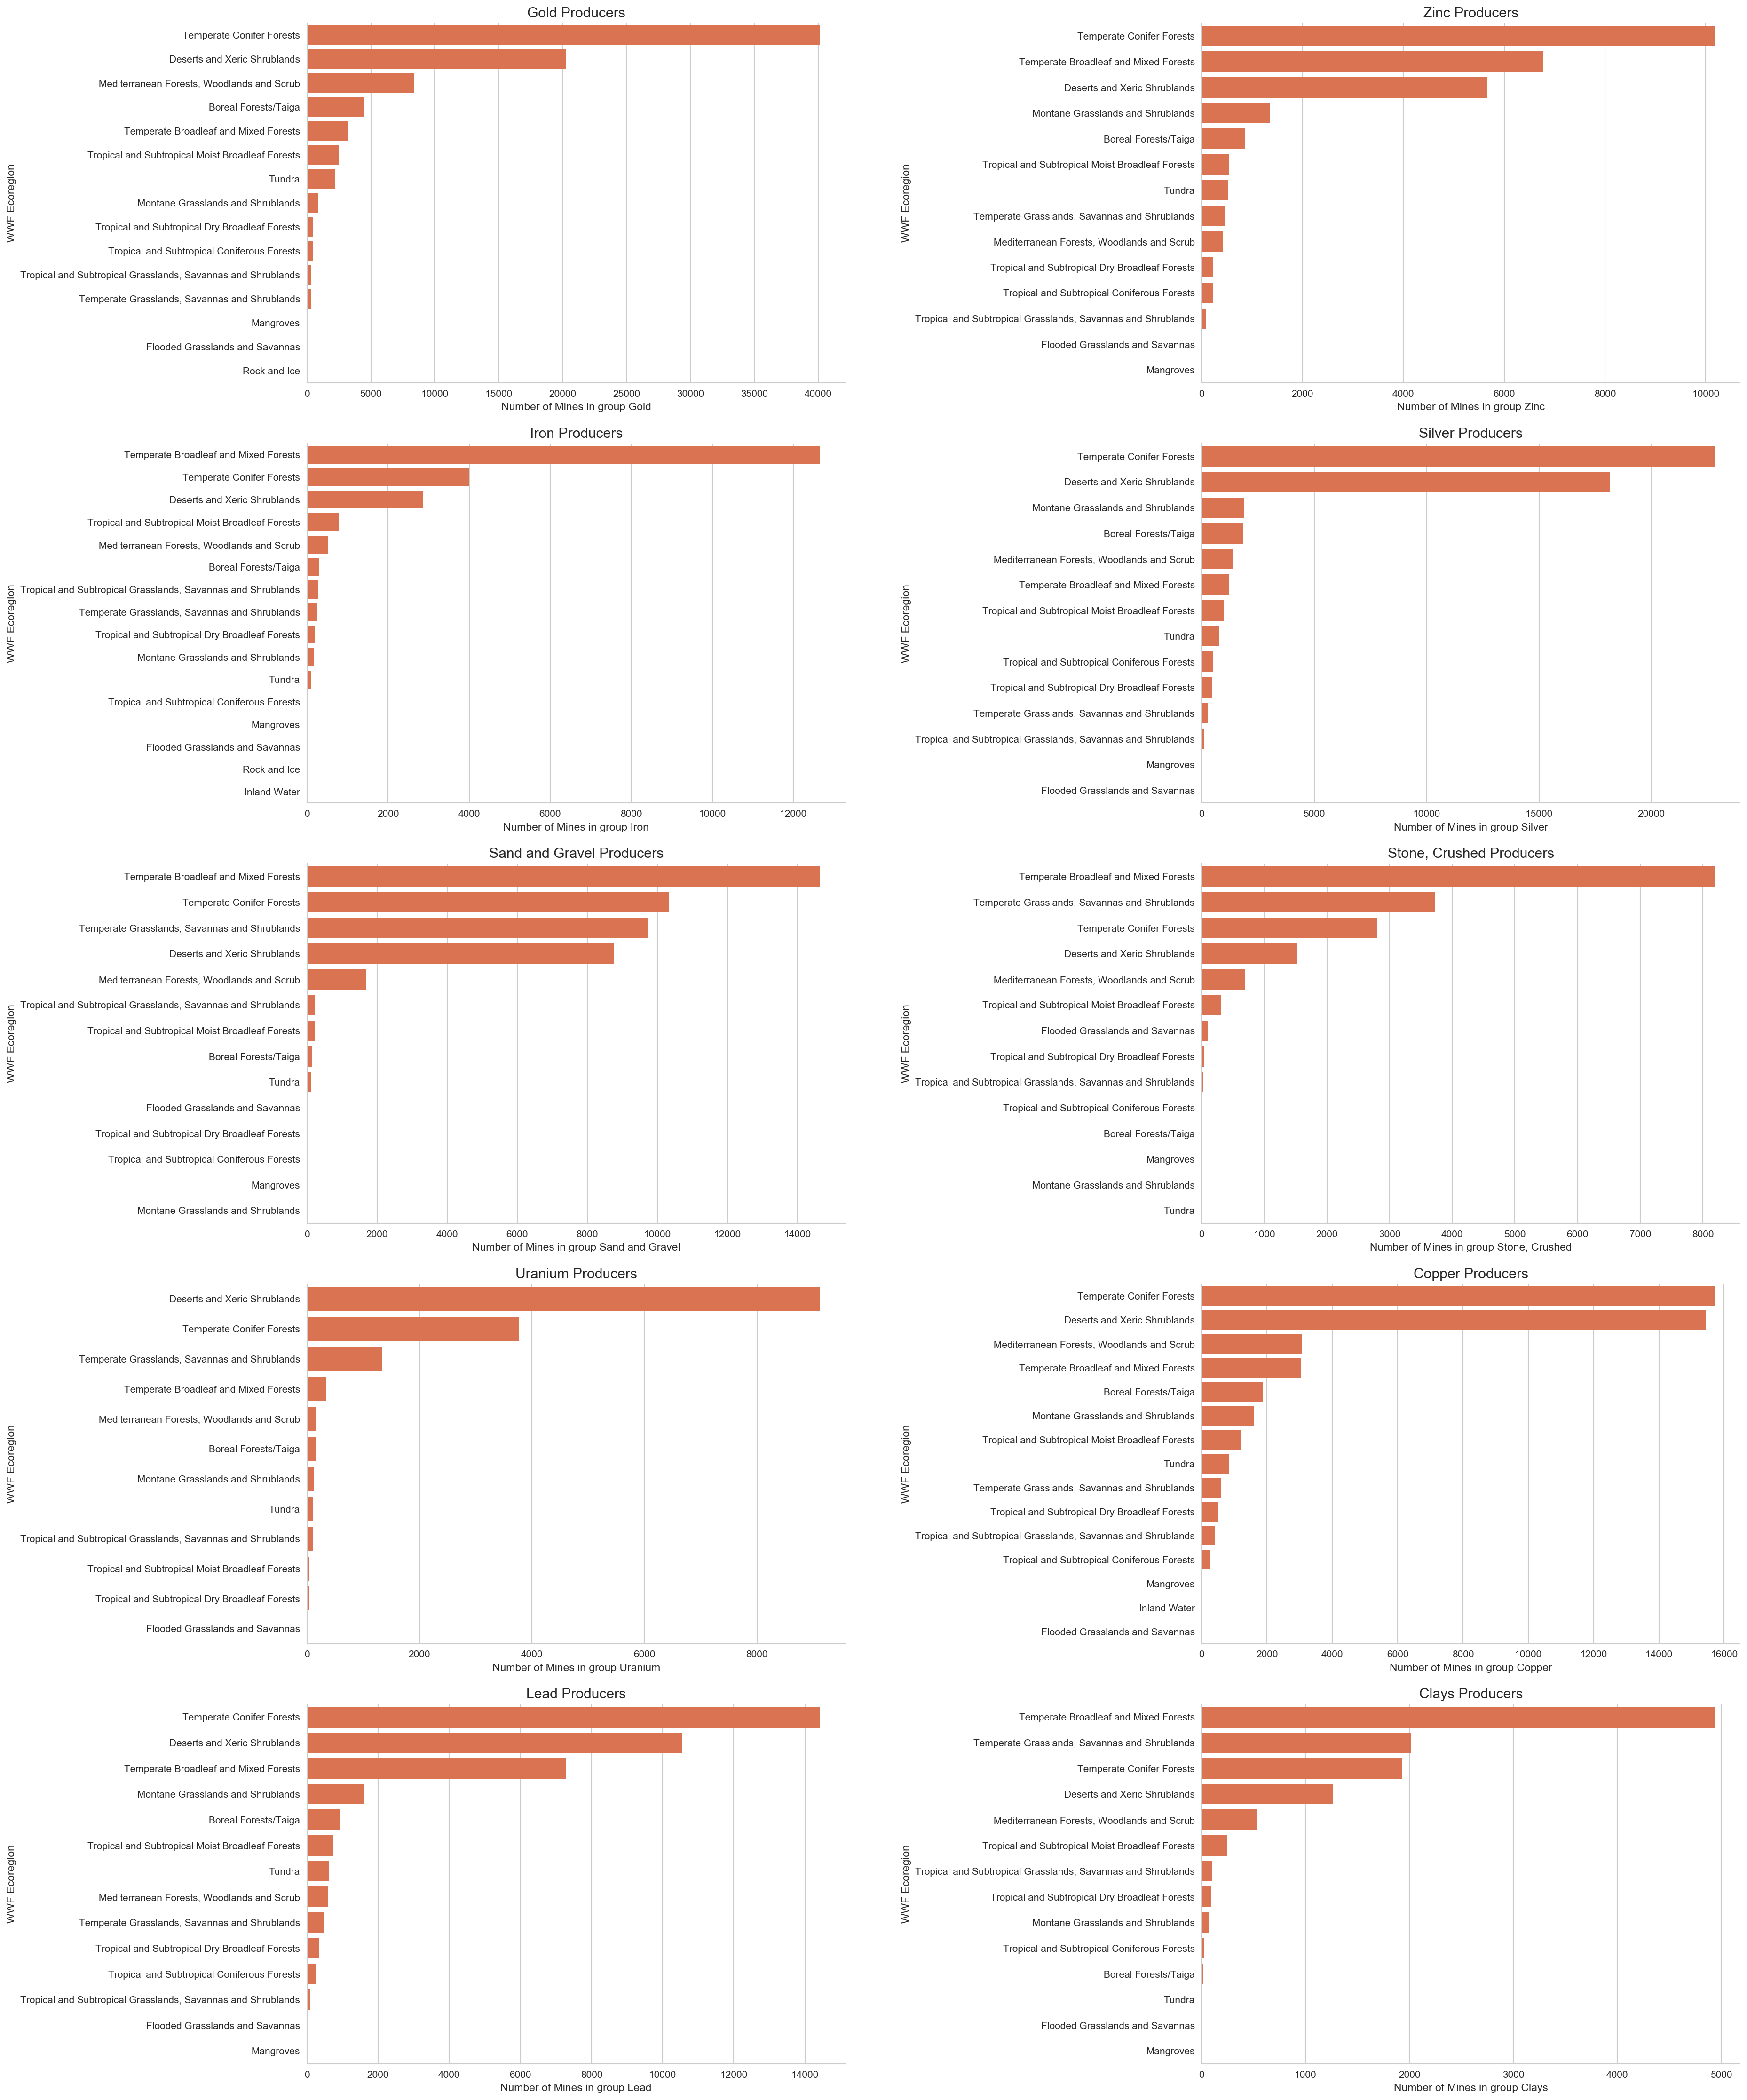

In [12]:
top10_groups = mines.groupby(mines.commod_group).count()['i'].sort_values(ascending=False)[:10].keys()



fig, axes = plt.subplots(5,2, figsize=(25,30), dpi=150)
for index, group in enumerate(top10_groups):
    print(group)
    col = index % 2
    row = index % 5
    thesemines = mines[mines.commod_group == group]

    counts = pd.DataFrame(thesemines.groupby("WWF_MHTNAM")['i'].count().sort_values(ascending=False))
    sns.set(font_scale=1.2)

    sns.set_style("whitegrid")

    sns.barplot(y=counts.index, x='i', data=counts, orient='h', color='#F1673B', ax=axes[row,col])
    sns.despine()
    axes[row,col].set(xlabel="Number of Mines in group " + group)
    axes[row,col].set(ylabel="WWF Ecoregion")
    axes[row,col].set(title=group+" Producers")


plt.tight_layout(w_pad=4)
plt.savefig("top10_ecos.png")

In [14]:
counts = pd.DataFrame(goldmines.groupby("WWF_MHTNAM")['i'].count().sort_values(ascending=False))
sns.set(font_scale=1.2)

sns.set_style("whitegrid")

ax = sns.barplot(y=counts.index, x='i', data=counts, orient='h', color='#F1673B')
sns.despine()
ax.set(xlabel="Number of Mines")
ax.set(ylabel="WWF Ecoregion")
ax.set(title="Copper Producers")

NameError: name 'goldmines' is not defined

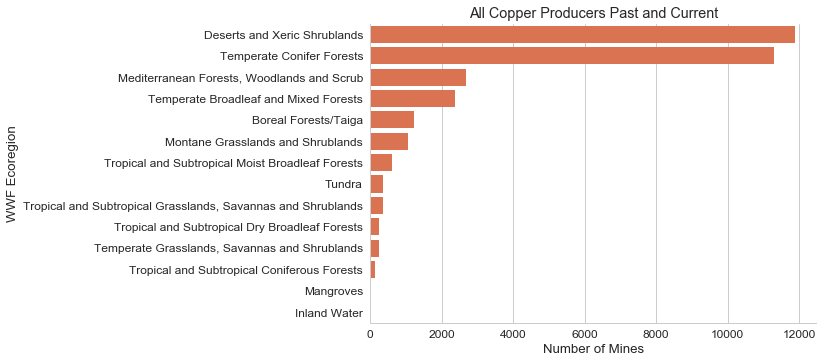

In [15]:
counts = pd.DataFrame(mines[(mines.commod=='Copper') &
                            (mines.dev_stat != "Occurrence")]
                      .groupby("WWF_MHTNAM")['i']
                      .count()
                      .sort_values(ascending=False))

sns.set_style("whitegrid")

ax = sns.barplot(y=counts.index, x='i', data=counts, orient='h', color='#F1673B')
ax.set(xlabel="Number of Mines")
ax.set(ylabel="WWF Ecoregion")
ax.set(title="All Copper Producers Past and Current")
sns.despine()

KeyboardInterrupt: 

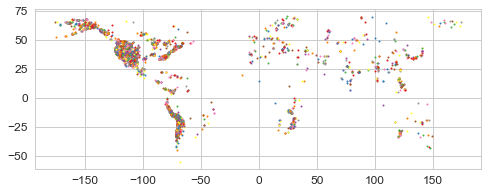

In [16]:
mines[(mines.commod=='Copper') & (mines.dev_stat != "Occurrence")].geometry.plot()

---


In [87]:
mrds_geom = [Point(xy) for xy in zip(mrds.longitude, mrds.latitude)]
mrds = gpd.GeoDataFrame(mrds, geometry=mrds_geom)
mrds_com = mrds.join(commod.set_index('dep_id'), on='dep_id', how='inner', rsuffix="_commod")
copper = mrds_com[(mrds_com.commod == 'Copper')].dropna()


In [88]:
regions = gpd.sjoin(ecoregions, copper, how='left')


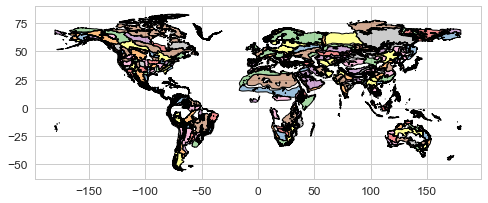

In [105]:
plottables = gpd.GeoSeries(regions.groupby(regions.index).apply(lambda x: x.dropna().geometry.head(1)))
plottables.plot()

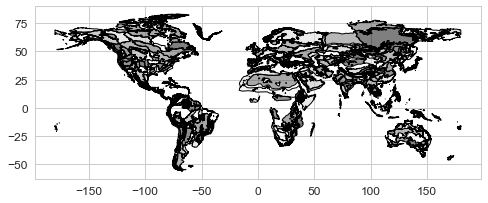

In [90]:
region_inx.dropna().plot()